<a href="https://colab.research.google.com/github/stefanogiagu/corso_AML_2023/blob/main/notebooks/es1/AML_2023_HandsOn_1_Classification_INTRO_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First HandsOn !
In this HandsOn we will recap the basics of pyTorch with a simple classification task

Slide for the day with the Task Description ([SLIDE](https://docs.google.com/presentation/d/1DCZn-I8bXQ_awkmR6I6u9be4MCHB0ljWTxBL9koOsXo/edit?usp=sharing))

Jamboard for the day ([BOARD](https://jamboard.google.com/d/1n694UZc-sQK2AZnI4RX88d-hoPytOPo_-5wnt3Bwlbc/edit?usp=sharing))

At the end of the lesson, I will put them as a pdf on the github

# Connect your drive!

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# Go to the RiNNgs folder!
use the command "cd" to  change directory


```
cd "directory"
```


then use "ls" (list) to show the files in the folder

## Are you in the correct directory?


In [2]:
cd /content/gdrive/MyDrive/RiNNgs

/content/gdrive/MyDrive/RiNNgs


# What's in the directory you are in?



In [3]:
ls

AML_2023_HandsOn_1_Classification_INTRO_Solution.ipynb


In [4]:
# we need to get some files from github
import os
success = os.path.exists("./ape62.py")
if not success:
  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/ape62.py
  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/apeml.py
  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/apesettings.py
  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py
  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/imager.py

--2023-03-08 14:09:52--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/ape62.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17101 (17K) [text/plain]
Saving to: ‘ape62.py’

ape62.py            100%[===================>]  16.70K  --.-KB/s    in 0.002s  

2023-03-08 14:09:52 (8.14 MB/s) - ‘ape62.py’ saved [17101/17101]

--2023-03-08 14:09:52--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/apeml.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38328 (37K) [te

In [5]:
ls

AML_2023_HandsOn_1_Classification_INTRO_Solution.ipynb  apesettings.py
ape62.py                                                data_preprocess.py
apeml.py                                                imager.py


# Lets create all the folders needed

In [6]:
import os
def CreateDir(path):
	# Create a directory if it does not exist
	success = os.path.exists(path)
	if not success:
		os.makedirs(path)
CreateDir("results")#
CreateDir("results/display")
CreateDir("results/preprocess")
CreateDir("data")

In [7]:
success = os.path.exists("data/event_08011.file")
if not success:
  ! wget  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file -P data/
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/data_08011.json

--2023-03-08 14:09:53--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375770 (367K) [application/octet-stream]
Saving to: ‘data/event_08011.file’

event_08011.file    100%[===================>] 366.96K  --.-KB/s    in 0.02s   

2023-03-08 14:09:54 (14.5 MB/s) - ‘data/event_08011.file’ saved [375770/375770]

--2023-03-08 14:09:54--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

# We need to build the dataset.
How can we call a python code from a notebook script?

Use the command


```
! python script.py ARG1,ARG2,...,ARGN
```

to call the "data_preprocess.py" that will find the run 0811 and form 16x16 images from it.

arguments are "08011 Conv 16 np_reco 0"

**Ignore all the warnings and the tensorflow calls. This function is doing a lot more than what we need**

In [8]:
! python data_preprocess.py 08011 Conv 16 np_reco 0

2023-03-08 14:09:55.139270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 14:09:56.175234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-08 14:09:56.175333: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-08 14:09:56.175349: W tensorfl

# Where are our files?

The script will write two files in the results/preprocess folder that we created before.

Check if you can find the files and that  *x_all_** is the rigth size (around 40 MB)

Use the command


```
ls -lh "path"
```



In [9]:
! ls -lh  results/preprocess/

total 40M
-rw------- 1 root root  82K Mar  8 14:10 prova16.pdf
-rw------- 1 root root  40M Mar  8 14:10 x_all_08011.npy
-rw------- 1 root root 313K Mar  8 14:10 y_all_08011.npy


# Read the data, check the data format, print an element.


*   Load the data with np.load
*   Print the data shape
*   Check the variable type
*   Use plt.matshow() to print an element



In [10]:
import numpy as np
dataset = "08011"
x_all = np.load( 'results/preprocess/' + 'x_all_{}.npy'.format(dataset))
y_all = np.load( 'results/preprocess/' + 'y_all_{}.npy'.format(dataset))


In [11]:
print("data shape : ", x_all.shape)
print("label shape : ", y_all.shape)
print("type of x_all[0]: ", type(x_all[0,0,0]))

data shape :  (20000, 16, 16)
label shape :  (20000, 4)
type of x_all[0]:  <class 'numpy.float64'>


Text(0.5, 1.0, 'An example of class 1')

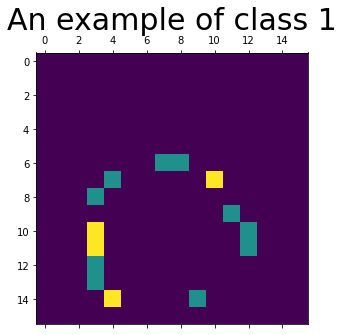

In [12]:
import matplotlib.pyplot as plt
to_plot = 10
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.matshow(x_all[to_plot,:,:])
ax.set_title("An example of class {}".format(np.argmax(y_all[to_plot])),fontsize=30)

# Plot an histogram of the average intensity per class
# A  trick:
When you do this kind of data visualization, you are creating a lot of variables. If you wrap your code in a function you will keep the workspace clean.

this shoud be [N,1] :  (20000,)


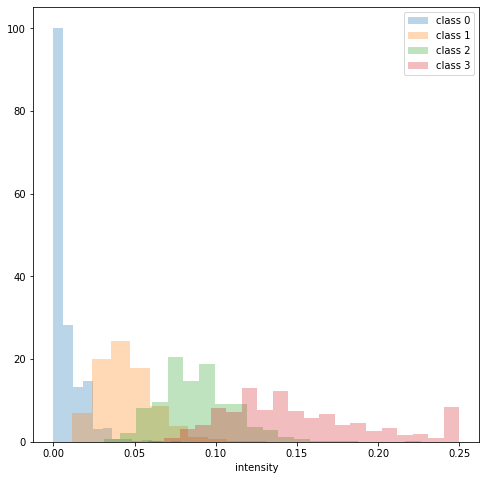

In [13]:
def plot_histo(x_all, y_all):

  classes = np.argmax(y_all,axis=1)

  intensities = x_all.reshape(x_all.shape[0],-1).mean(axis=1)
  print("this shoud be [N,1] : ",intensities.shape)


  f,ax = plt.subplots(1,1,figsize=(8,8))
  for c in [0,1,2,3]:
    ax.hist(intensities[classes==c],20,alpha=0.3,label="class {}".format(c),density=True)

  ax.set_xlabel("intensity")
  ax.legend()

plot_histo(x_all, y_all)

this shoud be [N,1] :  (18402,)


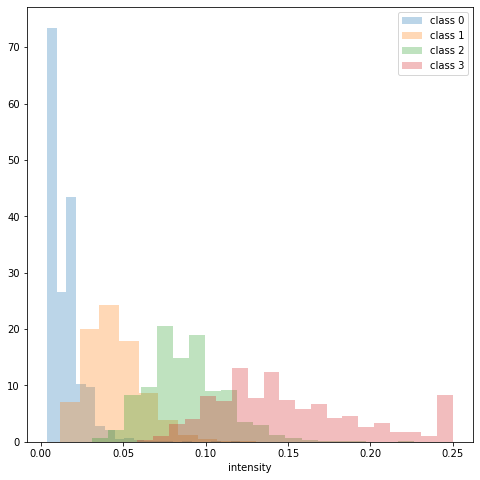

In [14]:
# remove the empty images
def remove_empty(x_all, y_all):
  intensities = x_all.reshape(x_all.shape[0],-1).mean(axis=1)
  y_all = y_all[intensities>0]
  x_all = x_all[intensities>0]
  return x_all, y_all

x_all, y_all = remove_empty(x_all, y_all)
plot_histo(x_all, y_all)

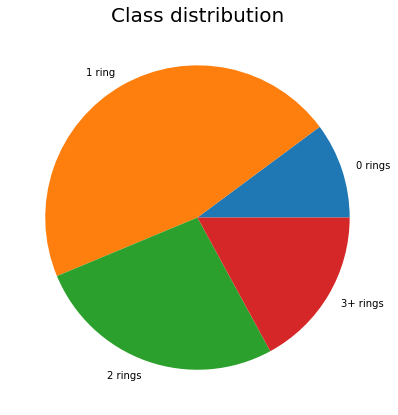

In [15]:

def piechartclasses(y_all):
  classes = np.argmax(y_all, axis=1)
  c = np.unique(classes)
  arr_c = [np.mean(classes==i) for i in c]


 
  # Creating plot
  fig = plt.figure(figsize =(10, 7))
  plt.pie(arr_c, labels = ["0 rings", "1 ring", "2 rings", "3+ rings"])
 
  # show plot
  plt.title("Class distribution",fontsize=20)
  plt.show()
piechartclasses(y_all) 

# Load images and prepare batches

In [16]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.utils.data as data


class HitImageGenerator(Dataset):
  

    def __init__(self, X,y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]
        label = self.y[idx]
        #image = (image-image.reshape(-1).mean())/image.reshape(-1).std()
        image=image/image.sum()
        tensor_image = torch.from_numpy(image).unsqueeze(0).float()  # Add a channel dimension
        tensor_label = torch.from_numpy(label).float()
        return tensor_image, tensor_label

class BalancedDataLoader(data.DataLoader):
    def __init__(self, dataset, batch_size=1, shuffle=True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

        # If sampler is not provided, create a new one
    
        # Count the number of samples in each class
        class_counts = torch.bincount(torch.tensor(np.argmax(dataset.y,axis=1)))

        # Compute the weight of each sample
        weights = 1.0 / class_counts[np.argmax(dataset.y,axis=1)]

        # Create a sampler that samples each class with equal probability
        sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))

        super().__init__(dataset, batch_size=batch_size, sampler=sampler)



In [17]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you have X_train, y_train, X_val, y_val, X_test, and y_test as your splits


# Lets split the dataset

train_dataset = HitImageGenerator(X_train,y_train)
train_loader = BalancedDataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = HitImageGenerator(X_val,y_val)
val_loader = BalancedDataLoader(val_dataset, batch_size=64, shuffle=False)

test_dataset = HitImageGenerator(X_test,y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)# no balanced generator for the test

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 4)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 16, 2)
        self.fc1 = nn.Linear(16 * 2 * 2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.dpo1 = nn.Dropout(p=0.3)
        self.fc3 = nn.Linear(64, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dpo1(x)
        x = self.fc3(x)# the crossentropy loss in pytorch to the softmax for you
        return x


model = Net()

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [20]:
def accuracy(y_pred, y_true):
    """
    Calculates the accuracy of the predicted labels.

    Args:
        y_pred (torch.Tensor): predicted labels
        y_true (torch.Tensor): true labels

    Returns:
        float: accuracy score
    """
    # Get the predicted class by finding the index of the maximum value along axis 1
    y_pred = torch.argmax(y_pred, axis=1)
    y_true = torch.argmax(y_true, axis=1)

    # Calculate the number of correctly classified examples
    correct = (y_pred == y_true).sum().item()

    # Calculate the total number of examples
    total = len(y_true)

    # Calculate the accuracy
    acc = correct / total

    return acc

Epoch 1, Validation Loss: 1.3863, Validation Accuracy: 0.2424
Best!
Epoch 2, Validation Loss: 1.3628, Validation Accuracy: 0.2523
Best!
Epoch 3, Validation Loss: 1.1959, Validation Accuracy: 0.4275
Best!
Epoch 4, Validation Loss: 1.0308, Validation Accuracy: 0.5874
Best!
Epoch 5, Validation Loss: 0.9520, Validation Accuracy: 0.6137
Best!
Epoch 6, Validation Loss: 0.9168, Validation Accuracy: 0.6307
Best!
Epoch 7, Validation Loss: 0.8660, Validation Accuracy: 0.6619
Best!
Epoch 8, Validation Loss: 0.8545, Validation Accuracy: 0.6666
Best!
Epoch 9, Validation Loss: 0.8013, Validation Accuracy: 0.6769
Best!
Epoch 10, Validation Loss: 0.7978, Validation Accuracy: 0.6845
Best!
Epoch 11, Validation Loss: 0.8852, Validation Accuracy: 0.6513
Epoch 12, Validation Loss: 0.7966, Validation Accuracy: 0.6822
Epoch 13, Validation Loss: 0.7827, Validation Accuracy: 0.6818
Epoch 14, Validation Loss: 0.7690, Validation Accuracy: 0.7071
Best!
Epoch 15, Validation Loss: 0.7693, Validation Accuracy: 0.686

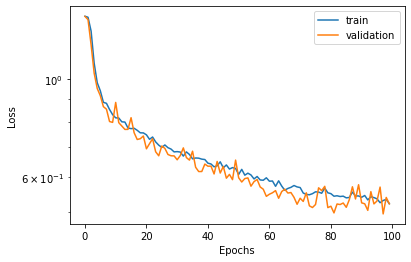

In [21]:
# Define the number of epochs and the patience for early stopping
num_epochs = 100
patience = 15

# Initialize the variables for tracking the best validation accuracy and the number of epochs since the best accuracy
best_val_acc = 0.0
epochs_since_best_val_acc = 0

train_curve=[]
val_curve=[]

# Train loop
for epoch in range(num_epochs):
    # Training
    model.train()
    tmp_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Backward pass and optimization
        optimizer.zero_grad()# clear the gradients
        loss.backward()# gradient of the loss
        optimizer.step()# new weigths
        tmp_loss += loss.detach().numpy()
    train_curve.append(tmp_loss/len(train_loader))  
    # Validation
    model.eval()
    with torch.no_grad():
        val_acc = 0.0
        val_total = 0
        val_loss = 0
        for data, target in val_loader:
            output = model(data)
            val_loss += criterion(output, target).item()
            
            
            val_acc += accuracy(output, target)

        val_acc /=  len(val_loader)
        val_loss /= len(val_loader)
        val_curve.append(val_loss)

        print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

        # Check if the validation accuracy has improved
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_since_best_val_acc = 0
            best_weights = model.state_dict()
            torch.save(best_weights, 'results/best_weights.pth')
            print("Best!")
        else:
            epochs_since_best_val_acc += 1

        # Check if early stopping is necessary
        if epochs_since_best_val_acc >= patience:
            print("Early stopping!")
            break
plt.figure()
plt.plot(train_curve,label="train")
plt.plot(val_curve,label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale("log")


In [22]:
model=Net()
model.load_state_dict(torch.load('results/best_weights.pth'))
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 16, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (dpo1): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

def test_model(model, test_loader):
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            
            outputs = model(inputs)
            targets = targets.numpy()
            outputs = outputs.numpy()

            predicted = np.argmax(outputs, 1)
            targets = np.argmax(targets , 1)

            y_true.extend(targets)
            y_pred.extend(predicted)

    cm = confusion_matrix(y_true, y_pred,normalize="true")

    return np.array(y_true), np.array(y_pred), cm

In [24]:
_,_,cm=test_model(model, test_loader)

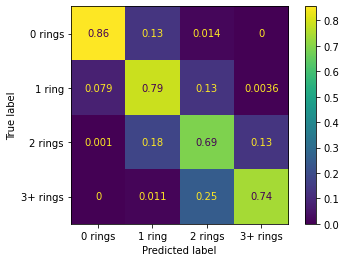

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0 rings", "1 ring", "2 rings", "3+ rings"])
disp.plot()

plt.show()